<a href="https://colab.research.google.com/github/mottasilvia/UCU-NLP/blob/main/PLN_Modelos_de_Lenguaje_Actividad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy matplotlib seaborn

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import product

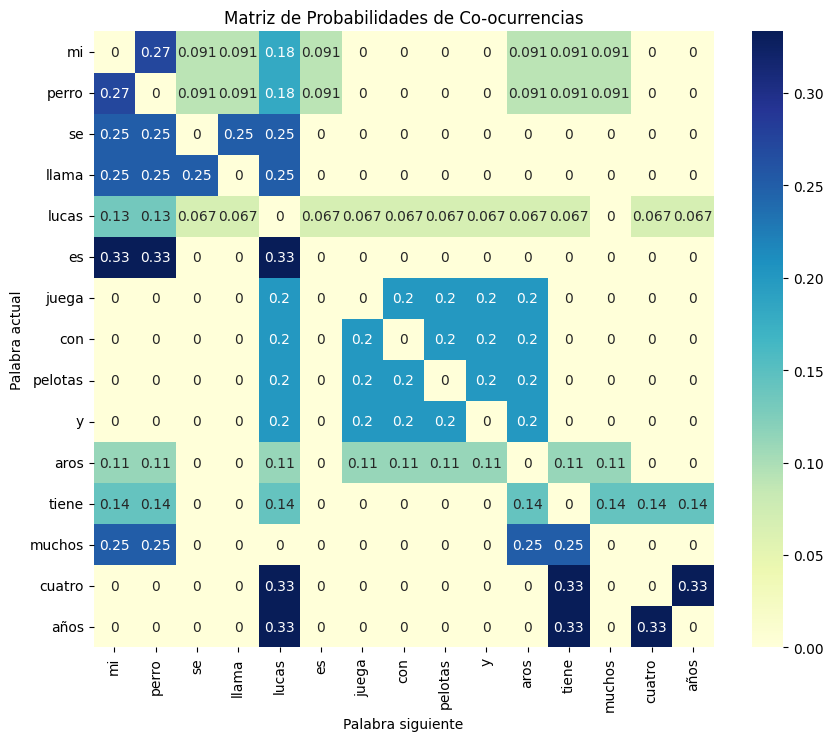

In [3]:
# Oraciones
sentences = [
    "mi perro se llama Lucas",
    "Lucas es mi perro",
    "Lucas juega con pelotas y aros",
    "mi perro tiene muchos aros",
    "Lucas tiene cuatro años"
]

# Tokenización de las oraciones
tokens = [sentence.lower().split() for sentence in sentences]
all_tokens = [token for sublist in tokens for token in sublist]

# Contar la frecuencia de cada palabra (unigramas)
unigram_counts = Counter(all_tokens)
vocabulary = list(unigram_counts.keys())
vocab_size = len(vocabulary)

# Crear un índice para cada palabra en el vocabulario
word_index = {word: idx for idx, word in enumerate(vocabulary)}

# Inicializar la matriz de co-ocurrencias
co_occurrence_matrix = np.zeros((vocab_size, vocab_size), dtype=int)

# Llenar la matriz de co-ocurrencias
for sentence in tokens:
    for word1, word2 in product(sentence, repeat=2):
        if word1 != word2:
            idx1, idx2 = word_index[word1], word_index[word2]
            co_occurrence_matrix[idx1][idx2] += 1

# Normalizar la matriz de co-ocurrencias para obtener probabilidades
co_occurrence_matrix_normalized = co_occurrence_matrix / co_occurrence_matrix.sum(axis=1, keepdims=True)

# Mostrar la matriz de co-ocurrencias usando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix_normalized, xticklabels=vocabulary, yticklabels=vocabulary, cmap='YlGnBu', annot=True)
plt.title('Matriz de Probabilidades de Co-ocurrencias')
plt.xlabel('Palabra siguiente')
plt.ylabel('Palabra actual')
plt.show()
